## Cluster Test on Digits Data

### Borrowed Idea and few scripts from: 
#### Parallel Machine Learning with scikit-learn and IPython
(https://github.com/ogrisel/parallel_ml_tutorial)

#### Initial Steps
- Mandatory: Add Scripts directory!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray();

import sys
import numpy as np
sys.path.append('../scripts')
import datasets

#### Cluster definition and Initialization

In [3]:
from IPython.parallel import Client
client = Client()
lb_view = client.load_balanced_view()

#### Model definition

In [4]:
from sklearn.svm import SVC
model = SVC()
model_keyword='digits_svm'
svc_params = {
    'C': np.logspace(-1, 2, 3),
    'gamma': np.logspace(-4, 0, 3),
    'kernel':['linear','rbf']
}

In [5]:
from sklearn.datasets import load_digits
from mmap_utils import persist_cv_splits
from sklearn.preprocessing import StandardScaler


digits = load_digits()
scaler = StandardScaler()
X_train = scaler.fit_transform(digits['data'][:1400,])
X_test = scaler.transform(digits['data'][1400:,])
Y_train=digits['target'][:1400,]
Y_test=digits['target'][1400:,]

digits_split_filenames = persist_cv_splits(X_train, Y_train,
    name='digits', random_state=4)

In [6]:
import model_selection
search = model_selection.RandomizedGridSeach(lb_view)
search.launch_for_splits(model, svc_params, digits_split_filenames)

Progress: 00% (000/090)

In [7]:
print(search.report())

Progress: 100% (090/090)

Rank 1: validation: 0.98686 (+/-0.00294) train: 0.99371 (+/-0.00049):
 {'kernel': 'rbf', 'C': 100.0, 'gamma': 0.0001}
Rank 2: validation: 0.98629 (+/-0.00246) train: 0.99943 (+/-0.00023):
 {'kernel': 'linear', 'C': 0.10000000000000001, 'gamma': 1.0}
Rank 3: validation: 0.98629 (+/-0.00246) train: 0.99943 (+/-0.00023):
 {'kernel': 'linear', 'C': 0.10000000000000001, 'gamma': 0.01}
Rank 4: validation: 0.98629 (+/-0.00246) train: 0.99943 (+/-0.00023):
 {'kernel': 'linear', 'C': 0.10000000000000001, 'gamma': 0.0001}
Rank 5: validation: 0.98400 (+/-0.00280) train: 1.00000 (+/-0.00000):
 {'kernel': 'rbf', 'C': 100.0, 'gamma': 0.01}


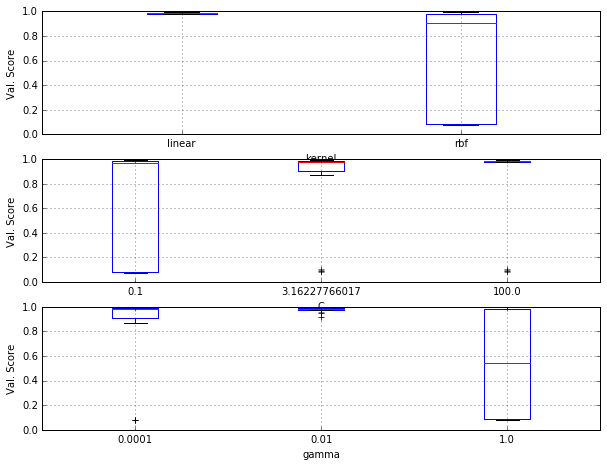

In [8]:
search.boxplot_parameters(display_train=False)

In [9]:
import imp
imp.reload(model_selection)
modfile='../models/'+model_keyword+'.pkl'
mod=search.save_best_model(X_train,Y_train,modfile)

In [10]:
print 'Performance on Train set: %0.2f'% (mod.score(X_train,Y_train))
print 'Performance on Test set: %0.2f'% (mod.score(X_test,Y_test))

Performance on Train set: 0.99
Performance on Test set: 0.92
